In [3]:
from pathlib import Path
from random import shuffle

import networkx as nx
import torch
import yaml
from tqdm import trange, tqdm

from graph import milp_solve_mds, prepare_graph

from ppo import PPO

In [15]:
base_path = '../experiments/2025-04-10-1625/version_0'
model_path = base_path + '/checkpoints/epoch=1399-step=2800.ckpt'
hparams_path = base_path + '/hparams.yaml'

In [16]:
ppo_model: PPO = PPO.load_from_checkpoint(model_path, map_location=torch.device("cpu"), hparams_file=hparams_path, device='cpu')

Sampling 10000 instances from G(range(100, 101), 0.15)...


100%|██████████| 10000/10000 [01:19<00:00, 126.44graph/s]


In [17]:
ppo_model

PPO(
  (critic): DQGN(
    (layers): ModuleList(
      (0): GCNConv(2, 64)
      (1): ReLU(inplace=True)
      (2): GCNConv(64, 64)
      (3): ReLU(inplace=True)
      (4): GCNConv(64, 64)
      (5): ReLU(inplace=True)
      (6): GCNConv(64, 64)
      (7): ReLU(inplace=True)
      (8): GCNConv(64, 64)
      (9): ReLU(inplace=True)
      (10): GCNConv(64, 64)
      (11): ReLU(inplace=True)
      (12): GCNConv(64, 64)
      (13): ReLU(inplace=True)
      (14): GCNConv(64, 64)
      (15): ReLU(inplace=True)
      (16): GCNConv(64, 64)
      (17): ReLU(inplace=True)
    )
    (node_transform): Linear(in_features=64, out_features=64, bias=False)
    (grph_transform): Linear(in_features=64, out_features=1, bias=False)
    (relu): ReLU(inplace=True)
    (tanh): Tanh()
  )
  (actor): DQGN(
    (layers): ModuleList(
      (0): GCNConv(2, 64)
      (1): ReLU(inplace=True)
      (2): GCNConv(64, 64)
      (3): ReLU(inplace=True)
      (4): GCNConv(64, 64)
      (5): ReLU(inplace=True)
      (6): 

In [18]:
from graph import is_ds

valid_ds = []
size_eq_mlip = []

conf = yaml.safe_load(Path(hparams_path).read_text())
n, p = conf['n'], conf['p']
tt_g = 300
graphs = []

print(f'sampling {tt_g} x G{n, p}')
for i in trange(tt_g):
    g = prepare_graph(i, range(n, conf['delta_n']+1), p, milp_solve_mds, g_nx=True, attrs=conf['graph_attr'])
    graphs.append(g)

print(f'solving mds')
for g in tqdm(graphs):

    # Perform an episode of actions
    s = []
    for step in range(n):
        _, action = ppo_model.agent.get_action(state=g)
        s.append(action)
        g.x = g.x.clone()
        g.x[action][0] = 1
        if is_ds(g.nx, s):
            break
    g.s = s

    valid_ds.append(all(v in s or len(g.nx[v].keys() & s) > 0 for v in g.nx))
    size_eq_mlip.append(len(s) <= len([i for i in g.y if i]))

sampling 300 x G(100, 0.15)


  0%|          | 0/300 [00:00<?, ?it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  0%|          | 1/300 [00:00<02:11,  2.27it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  1%|          | 2/300 [00:01<02:33,  1.94it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  1%|          | 3/300 [00:01<02:41,  1.83it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  1%|▏         | 4/300 [00:02<02:33,  1.92it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  2%|▏         | 5/300 [00:02<02:55,  1.68it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  2%|▏         | 6/300 [00:03<02:24,  2.04it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  2%|▏         | 7/300 [00:03<02:20,  2.09it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  3%|▎         | 8/300 [00:03<02:11,  2.22it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  3%|▎         | 9/300 [00:04<02:16,  2.14it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  3%|▎         | 10/300 [00:04<01:55,  2.51it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  4%|▎         | 11/300 [00:05<02:19,  2.08it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  4%|▍         | 12/300 [00:06<02:35,  1.86it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  4%|▍         | 13/300 [00:06<02:13,  2.16it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  5%|▍         | 14/300 [00:06<02:14,  2.12it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  5%|▌         | 15/300 [00:07<01:58,  2.41it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  5%|▌         | 16/300 [00:07<02:25,  1.96it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  6%|▌         | 17/300 [00:08<02:07,  2.22it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  6%|▌         | 18/300 [00:08<02:12,  2.13it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  6%|▋         | 19/300 [00:08<01:56,  2.42it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  7%|▋         | 20/300 [00:09<01:45,  2.65it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  7%|▋         | 21/300 [00:09<01:37,  2.87it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  7%|▋         | 22/300 [00:09<01:43,  2.68it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  8%|▊         | 23/300 [00:10<01:59,  2.31it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  8%|▊         | 24/300 [00:11<02:04,  2.21it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  8%|▊         | 25/300 [00:11<02:11,  2.09it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  9%|▊         | 26/300 [00:11<01:51,  2.46it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  9%|▉         | 27/300 [00:12<01:57,  2.32it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


  9%|▉         | 28/300 [00:13<02:27,  1.84it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 10%|▉         | 29/300 [00:14<04:05,  1.10it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 10%|█         | 30/300 [00:15<04:12,  1.07it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 10%|█         | 31/300 [00:16<03:37,  1.23it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 11%|█         | 32/300 [00:18<04:47,  1.07s/it]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 11%|█         | 33/300 [00:18<04:15,  1.05it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 11%|█▏        | 34/300 [00:19<03:31,  1.26it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 12%|█▏        | 35/300 [00:19<02:57,  1.49it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 12%|█▏        | 36/300 [00:19<02:19,  1.90it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 12%|█▏        | 37/300 [00:20<02:34,  1.70it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 13%|█▎        | 38/300 [00:20<02:26,  1.78it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 13%|█▎        | 39/300 [00:21<02:00,  2.16it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 13%|█▎        | 40/300 [00:21<01:47,  2.42it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 14%|█▎        | 41/300 [00:21<01:34,  2.73it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 14%|█▍        | 42/300 [00:22<01:35,  2.70it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 14%|█▍        | 43/300 [00:22<01:25,  2.99it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 15%|█▍        | 44/300 [00:23<01:54,  2.23it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 15%|█▌        | 45/300 [00:23<01:48,  2.34it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 15%|█▌        | 46/300 [00:23<01:36,  2.64it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 16%|█▌        | 47/300 [00:23<01:25,  2.96it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 16%|█▌        | 48/300 [00:24<01:34,  2.66it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 16%|█▋        | 49/300 [00:24<01:30,  2.78it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 17%|█▋        | 50/300 [00:25<01:41,  2.46it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 17%|█▋        | 51/300 [00:25<01:39,  2.51it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 17%|█▋        | 52/300 [00:26<01:39,  2.49it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 18%|█▊        | 53/300 [00:26<01:54,  2.16it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 18%|█▊        | 54/300 [00:26<01:40,  2.44it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 18%|█▊        | 55/300 [00:27<01:34,  2.59it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 19%|█▊        | 56/300 [00:27<01:50,  2.20it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 19%|█▉        | 57/300 [00:28<02:02,  1.98it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 19%|█▉        | 58/300 [00:28<02:00,  2.01it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 20%|█▉        | 59/300 [00:29<01:46,  2.26it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 20%|██        | 60/300 [00:29<01:31,  2.61it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 20%|██        | 61/300 [00:29<01:20,  2.96it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 21%|██        | 62/300 [00:30<01:14,  3.18it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 21%|██        | 63/300 [00:30<01:32,  2.55it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 21%|██▏       | 64/300 [00:30<01:32,  2.55it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 22%|██▏       | 65/300 [00:31<01:23,  2.81it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 22%|██▏       | 66/300 [00:31<01:23,  2.80it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 22%|██▏       | 67/300 [00:31<01:12,  3.20it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 23%|██▎       | 68/300 [00:32<01:04,  3.61it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 23%|██▎       | 69/300 [00:32<01:18,  2.94it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 23%|██▎       | 70/300 [00:32<01:07,  3.40it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 24%|██▎       | 71/300 [00:32<01:01,  3.73it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 24%|██▍       | 72/300 [00:33<01:12,  3.15it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 24%|██▍       | 73/300 [00:33<01:07,  3.36it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 25%|██▍       | 74/300 [00:33<01:03,  3.56it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 25%|██▌       | 75/300 [00:34<00:57,  3.90it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 25%|██▌       | 76/300 [00:34<01:20,  2.77it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 26%|██▌       | 77/300 [00:34<01:15,  2.96it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 26%|██▌       | 78/300 [00:35<01:12,  3.06it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 26%|██▋       | 79/300 [00:35<01:17,  2.85it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 27%|██▋       | 80/300 [00:35<01:11,  3.09it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 27%|██▋       | 81/300 [00:36<01:12,  3.04it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 27%|██▋       | 82/300 [00:36<01:13,  2.98it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 28%|██▊       | 83/300 [00:36<01:16,  2.83it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 28%|██▊       | 84/300 [00:37<01:17,  2.78it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 28%|██▊       | 85/300 [00:37<01:17,  2.77it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 29%|██▊       | 86/300 [00:38<01:16,  2.79it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 29%|██▉       | 87/300 [00:38<01:05,  3.26it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 29%|██▉       | 88/300 [00:38<00:57,  3.66it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 30%|██▉       | 89/300 [00:38<00:56,  3.76it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 30%|███       | 90/300 [00:39<01:16,  2.76it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 30%|███       | 91/300 [00:39<01:05,  3.19it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 31%|███       | 92/300 [00:39<01:03,  3.29it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 31%|███       | 93/300 [00:40<01:23,  2.49it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 31%|███▏      | 94/300 [00:40<01:21,  2.54it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 32%|███▏      | 95/300 [00:41<01:16,  2.70it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 32%|███▏      | 96/300 [00:41<01:11,  2.85it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600
Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 33%|███▎      | 98/300 [00:41<00:52,  3.84it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 33%|███▎      | 99/300 [00:41<00:49,  4.06it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 33%|███▎      | 100/300 [00:42<00:49,  4.07it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 34%|███▎      | 101/300 [00:42<00:52,  3.78it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 34%|███▍      | 102/300 [00:42<00:56,  3.53it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 34%|███▍      | 103/300 [00:43<00:58,  3.36it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 35%|███▍      | 104/300 [00:43<01:10,  2.80it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 35%|███▌      | 105/300 [00:44<01:15,  2.60it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 35%|███▌      | 106/300 [00:44<01:30,  2.14it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 36%|███▌      | 107/300 [00:45<01:21,  2.37it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 36%|███▌      | 108/300 [00:45<01:32,  2.07it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 36%|███▋      | 109/300 [00:46<01:26,  2.21it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 37%|███▋      | 110/300 [00:46<01:23,  2.27it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 37%|███▋      | 111/300 [00:46<01:16,  2.46it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 37%|███▋      | 112/300 [00:47<01:50,  1.69it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 38%|███▊      | 113/300 [00:48<01:31,  2.04it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 38%|███▊      | 114/300 [00:48<01:21,  2.27it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 38%|███▊      | 115/300 [00:48<01:06,  2.80it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 39%|███▊      | 116/300 [00:49<01:23,  2.20it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 39%|███▉      | 117/300 [00:49<01:36,  1.91it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 39%|███▉      | 118/300 [00:50<01:22,  2.20it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 40%|███▉      | 119/300 [00:51<01:39,  1.82it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 40%|████      | 120/300 [00:51<01:24,  2.14it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 40%|████      | 121/300 [00:51<01:09,  2.57it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 41%|████      | 122/300 [00:51<01:06,  2.69it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 41%|████      | 123/300 [00:52<00:59,  2.96it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 41%|████▏     | 124/300 [00:52<01:00,  2.90it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 42%|████▏     | 125/300 [00:52<01:03,  2.73it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 42%|████▏     | 126/300 [00:53<00:55,  3.12it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 42%|████▏     | 127/300 [00:53<00:51,  3.35it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 43%|████▎     | 128/300 [00:53<00:54,  3.16it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 43%|████▎     | 129/300 [00:53<00:53,  3.22it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 43%|████▎     | 130/300 [00:54<00:50,  3.37it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 44%|████▎     | 131/300 [00:54<00:50,  3.38it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 44%|████▍     | 132/300 [00:54<00:58,  2.88it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 44%|████▍     | 133/300 [00:55<01:08,  2.43it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 45%|████▍     | 134/300 [00:56<01:19,  2.10it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 45%|████▌     | 135/300 [00:56<01:08,  2.41it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 45%|████▌     | 136/300 [00:56<00:59,  2.75it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 46%|████▌     | 137/300 [00:56<00:52,  3.09it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 46%|████▌     | 138/300 [00:57<00:48,  3.31it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 46%|████▋     | 139/300 [00:57<00:56,  2.85it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 47%|████▋     | 140/300 [00:58<01:40,  1.59it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 47%|████▋     | 141/300 [00:59<01:31,  1.74it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 47%|████▋     | 142/300 [00:59<01:27,  1.81it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 48%|████▊     | 143/300 [01:00<01:14,  2.10it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 48%|████▊     | 144/300 [01:00<01:03,  2.46it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 48%|████▊     | 145/300 [01:00<01:04,  2.42it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 49%|████▊     | 146/300 [01:01<00:58,  2.62it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 49%|████▉     | 147/300 [01:01<01:18,  1.94it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 49%|████▉     | 148/300 [01:02<01:13,  2.08it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 50%|████▉     | 149/300 [01:02<01:10,  2.13it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 50%|█████     | 150/300 [01:03<01:01,  2.46it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 50%|█████     | 151/300 [01:03<00:55,  2.70it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 51%|█████     | 152/300 [01:03<00:47,  3.13it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 51%|█████     | 153/300 [01:03<00:43,  3.36it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 51%|█████▏    | 154/300 [01:04<00:40,  3.63it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 52%|█████▏    | 155/300 [01:04<00:40,  3.61it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 52%|█████▏    | 156/300 [01:04<00:41,  3.49it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 52%|█████▏    | 157/300 [01:05<00:53,  2.69it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 53%|█████▎    | 158/300 [01:05<00:46,  3.03it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 53%|█████▎    | 159/300 [01:05<00:38,  3.70it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 53%|█████▎    | 160/300 [01:06<00:47,  2.95it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 54%|█████▎    | 161/300 [01:06<00:51,  2.70it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 54%|█████▍    | 162/300 [01:06<00:47,  2.94it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 54%|█████▍    | 163/300 [01:06<00:41,  3.33it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 55%|█████▍    | 164/300 [01:07<00:41,  3.28it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 55%|█████▌    | 165/300 [01:07<00:46,  2.93it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 55%|█████▌    | 166/300 [01:08<00:44,  3.01it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 56%|█████▌    | 167/300 [01:08<00:48,  2.76it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 56%|█████▌    | 168/300 [01:08<00:54,  2.44it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 56%|█████▋    | 169/300 [01:09<00:52,  2.49it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 57%|█████▋    | 170/300 [01:09<00:54,  2.37it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 57%|█████▋    | 171/300 [01:10<00:58,  2.21it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 57%|█████▋    | 172/300 [01:10<00:55,  2.32it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 58%|█████▊    | 173/300 [01:11<01:06,  1.92it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 58%|█████▊    | 174/300 [01:11<01:04,  1.97it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 58%|█████▊    | 175/300 [01:12<00:53,  2.34it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 59%|█████▊    | 176/300 [01:12<00:51,  2.43it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 59%|█████▉    | 177/300 [01:12<00:50,  2.43it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 59%|█████▉    | 178/300 [01:13<00:46,  2.63it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 60%|█████▉    | 179/300 [01:13<00:45,  2.65it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 60%|██████    | 180/300 [01:13<00:39,  3.03it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 60%|██████    | 181/300 [01:14<00:36,  3.28it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 61%|██████    | 182/300 [01:14<00:38,  3.08it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 61%|██████    | 183/300 [01:14<00:34,  3.36it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 61%|██████▏   | 184/300 [01:14<00:32,  3.60it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 62%|██████▏   | 185/300 [01:15<00:30,  3.77it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 62%|██████▏   | 186/300 [01:15<00:30,  3.70it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 62%|██████▏   | 187/300 [01:16<00:52,  2.16it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 63%|██████▎   | 188/300 [01:16<00:49,  2.25it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 63%|██████▎   | 189/300 [01:17<00:53,  2.08it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 63%|██████▎   | 190/300 [01:17<00:50,  2.20it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 64%|██████▎   | 191/300 [01:18<00:53,  2.03it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 64%|██████▍   | 192/300 [01:18<00:45,  2.38it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 64%|██████▍   | 193/300 [01:18<00:40,  2.67it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 65%|██████▍   | 194/300 [01:19<00:39,  2.68it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 65%|██████▌   | 195/300 [01:19<00:36,  2.85it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 65%|██████▌   | 196/300 [01:19<00:35,  2.96it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 66%|██████▌   | 197/300 [01:20<00:41,  2.48it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 66%|██████▌   | 198/300 [01:20<00:39,  2.57it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 66%|██████▋   | 199/300 [01:21<00:45,  2.22it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 67%|██████▋   | 200/300 [01:21<00:38,  2.59it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 67%|██████▋   | 201/300 [01:21<00:30,  3.23it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 67%|██████▋   | 202/300 [01:21<00:29,  3.36it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 68%|██████▊   | 203/300 [01:22<00:30,  3.19it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 68%|██████▊   | 204/300 [01:22<00:32,  2.95it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 68%|██████▊   | 205/300 [01:23<00:35,  2.68it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 69%|██████▊   | 206/300 [01:23<00:35,  2.67it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 69%|██████▉   | 207/300 [01:24<00:41,  2.22it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 69%|██████▉   | 208/300 [01:24<00:45,  2.03it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 70%|██████▉   | 209/300 [01:27<01:39,  1.09s/it]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 70%|███████   | 210/300 [01:28<01:31,  1.02s/it]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 70%|███████   | 211/300 [01:28<01:22,  1.08it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 71%|███████   | 212/300 [01:31<02:05,  1.42s/it]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 71%|███████   | 213/300 [01:32<02:00,  1.38s/it]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 71%|███████▏  | 214/300 [01:33<01:39,  1.16s/it]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 72%|███████▏  | 215/300 [01:33<01:22,  1.03it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 72%|███████▏  | 216/300 [01:35<01:36,  1.14s/it]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 72%|███████▏  | 217/300 [01:36<01:25,  1.03s/it]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 73%|███████▎  | 218/300 [01:36<01:12,  1.13it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 73%|███████▎  | 219/300 [01:37<01:04,  1.26it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 73%|███████▎  | 220/300 [01:37<00:55,  1.43it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 74%|███████▎  | 221/300 [01:38<01:01,  1.28it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 74%|███████▍  | 222/300 [01:39<00:55,  1.41it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 74%|███████▍  | 223/300 [01:40<01:00,  1.28it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 75%|███████▍  | 224/300 [01:40<00:55,  1.37it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 75%|███████▌  | 225/300 [01:41<00:50,  1.48it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 75%|███████▌  | 226/300 [01:41<00:43,  1.70it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 76%|███████▌  | 227/300 [01:42<00:39,  1.85it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 76%|███████▌  | 228/300 [01:42<00:43,  1.64it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 76%|███████▋  | 229/300 [01:44<00:55,  1.27it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 77%|███████▋  | 230/300 [01:44<00:44,  1.58it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 77%|███████▋  | 231/300 [01:44<00:36,  1.90it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 77%|███████▋  | 232/300 [01:45<00:33,  2.03it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 78%|███████▊  | 233/300 [01:45<00:29,  2.30it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 78%|███████▊  | 234/300 [01:45<00:27,  2.42it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 78%|███████▊  | 235/300 [01:46<00:26,  2.44it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 79%|███████▊  | 236/300 [01:46<00:25,  2.49it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 79%|███████▉  | 237/300 [01:47<00:29,  2.16it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 79%|███████▉  | 238/300 [01:47<00:27,  2.28it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 80%|███████▉  | 239/300 [01:47<00:22,  2.66it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 80%|████████  | 240/300 [01:48<00:22,  2.66it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 80%|████████  | 241/300 [01:48<00:25,  2.32it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 81%|████████  | 242/300 [01:49<00:27,  2.10it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 81%|████████  | 243/300 [01:50<00:30,  1.85it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 81%|████████▏ | 244/300 [01:50<00:32,  1.74it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 82%|████████▏ | 245/300 [01:51<00:28,  1.94it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 82%|████████▏ | 246/300 [01:51<00:26,  2.07it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 82%|████████▏ | 247/300 [01:52<00:34,  1.54it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 83%|████████▎ | 248/300 [01:52<00:27,  1.89it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 83%|████████▎ | 249/300 [01:53<00:22,  2.23it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 83%|████████▎ | 250/300 [01:53<00:21,  2.28it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 84%|████████▎ | 251/300 [01:54<00:28,  1.75it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 84%|████████▍ | 252/300 [01:55<00:30,  1.58it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 84%|████████▍ | 253/300 [01:55<00:29,  1.59it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 85%|████████▍ | 254/300 [01:56<00:25,  1.81it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 85%|████████▌ | 255/300 [01:56<00:21,  2.09it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 85%|████████▌ | 256/300 [01:56<00:16,  2.63it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 86%|████████▌ | 257/300 [01:56<00:16,  2.64it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 86%|████████▌ | 258/300 [01:57<00:15,  2.77it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 86%|████████▋ | 259/300 [01:57<00:17,  2.37it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 87%|████████▋ | 260/300 [01:58<00:16,  2.44it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 87%|████████▋ | 261/300 [01:58<00:16,  2.36it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 87%|████████▋ | 262/300 [01:59<00:16,  2.26it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 88%|████████▊ | 263/300 [01:59<00:16,  2.20it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 88%|████████▊ | 264/300 [01:59<00:15,  2.32it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 88%|████████▊ | 265/300 [02:00<00:15,  2.29it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 89%|████████▊ | 266/300 [02:01<00:19,  1.79it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 89%|████████▉ | 267/300 [02:01<00:16,  1.99it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 89%|████████▉ | 268/300 [02:02<00:16,  1.95it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 90%|████████▉ | 269/300 [02:02<00:16,  1.84it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 90%|█████████ | 270/300 [02:03<00:15,  1.94it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 90%|█████████ | 271/300 [02:03<00:13,  2.13it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 91%|█████████ | 272/300 [02:04<00:17,  1.61it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 91%|█████████ | 273/300 [02:04<00:13,  2.01it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 91%|█████████▏| 274/300 [02:05<00:11,  2.35it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 92%|█████████▏| 275/300 [02:05<00:09,  2.61it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 92%|█████████▏| 276/300 [02:05<00:08,  2.79it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 92%|█████████▏| 277/300 [02:06<00:09,  2.52it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 93%|█████████▎| 278/300 [02:06<00:10,  2.04it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 93%|█████████▎| 279/300 [02:07<00:11,  1.87it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 93%|█████████▎| 280/300 [02:07<00:09,  2.03it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 94%|█████████▎| 281/300 [02:08<00:08,  2.25it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 94%|█████████▍| 282/300 [02:08<00:08,  2.17it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 94%|█████████▍| 283/300 [02:09<00:07,  2.20it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 95%|█████████▍| 284/300 [02:09<00:07,  2.20it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 95%|█████████▌| 285/300 [02:10<00:07,  1.98it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 95%|█████████▌| 286/300 [02:10<00:05,  2.52it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 96%|█████████▌| 287/300 [02:10<00:05,  2.44it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 96%|█████████▌| 288/300 [02:11<00:05,  2.04it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 96%|█████████▋| 289/300 [02:11<00:04,  2.41it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 97%|█████████▋| 290/300 [02:12<00:04,  2.41it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 97%|█████████▋| 291/300 [02:12<00:04,  2.25it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 97%|█████████▋| 292/300 [02:13<00:04,  1.94it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 98%|█████████▊| 293/300 [02:14<00:04,  1.67it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 98%|█████████▊| 294/300 [02:14<00:03,  1.87it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 98%|█████████▊| 295/300 [02:14<00:02,  1.92it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 99%|█████████▊| 296/300 [02:15<00:02,  1.81it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 99%|█████████▉| 297/300 [02:15<00:01,  1.98it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


 99%|█████████▉| 298/300 [02:16<00:01,  1.92it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


100%|█████████▉| 299/300 [02:16<00:00,  2.10it/s]

Restricted license - for non-production use only - expires 2026-11-23
Set parameter TimeLimit to value 3600


100%|██████████| 300/300 [02:17<00:00,  2.18it/s]


solving mds


100%|██████████| 300/300 [03:55<00:00,  1.27it/s]


In [19]:
f'apx-ratio {sum(len(g.s)/(g.y == 1).sum() for g in graphs)/len(graphs):.2f}'

'apx-ratio 3.92'

In [20]:
conf

{'batch_size': 5000,
 'clip_ratio': 0.2,
 'delta_n': 100,
 'gamma': 0.99,
 'graph_attr': ['dominable_neighbors'],
 'lam': 0.95,
 'lr_actor': 0.0003,
 'lr_critic': 0.001,
 'max_episode_len': 1000,
 'n': 100,
 'nb_optim_iters': 4,
 'p': 0.15,
 's': 10000,
 'steps_per_epoch': 2048}

In [21]:
print(f'{100*sum(valid_ds)/tt_g}% valid DS      {100*sum(size_eq_mlip)/tt_g}% equivalent to MILP')

0.0% valid DS      0.0% equivalent to MILP


In [22]:
graphs[0].s

[tensor([22]),
 tensor([66]),
 tensor([18]),
 tensor([36]),
 tensor([14]),
 tensor([67]),
 tensor([3]),
 tensor([85]),
 tensor([74]),
 tensor([88]),
 tensor([93]),
 tensor([14]),
 tensor([54]),
 tensor([39]),
 tensor([99]),
 tensor([94]),
 tensor([32]),
 tensor([31]),
 tensor([69]),
 tensor([32]),
 tensor([42]),
 tensor([23]),
 tensor([14]),
 tensor([28]),
 tensor([80]),
 tensor([53]),
 tensor([7]),
 tensor([79]),
 tensor([53]),
 tensor([40]),
 tensor([39]),
 tensor([1]),
 tensor([6]),
 tensor([74]),
 tensor([65]),
 tensor([34]),
 tensor([65]),
 tensor([77]),
 tensor([84]),
 tensor([75]),
 tensor([43]),
 tensor([77]),
 tensor([21]),
 tensor([85]),
 tensor([58]),
 tensor([58]),
 tensor([93]),
 tensor([21]),
 tensor([30]),
 tensor([30]),
 tensor([26])]

[tensor([1]), tensor([4]), tensor([4]), tensor([6]), tensor([7]), tensor([8]), tensor([16]), tensor([16]), tensor([16]), tensor([18]), tensor([20]), tensor([21]), tensor([23]), tensor([25]), tensor([26]), tensor([29]), tensor([31]), tensor([37]), tensor([38]), tensor([44]), tensor([45]), tensor([46]), tensor([47]), tensor([47]), tensor([47]), tensor([55]), tensor([57]), tensor([58]), tensor([59]), tensor([65]), tensor([68]), tensor([68]), tensor([71]), tensor([76]), tensor([78]), tensor([79]), tensor([79]), tensor([80]), tensor([85]), tensor([89]), tensor([90]), tensor([90]), tensor([91]), tensor([91]), tensor([92]), tensor([93]), tensor([97])]
[12, 16, 17, 24, 37, 56, 64, 82, 88]
9
47


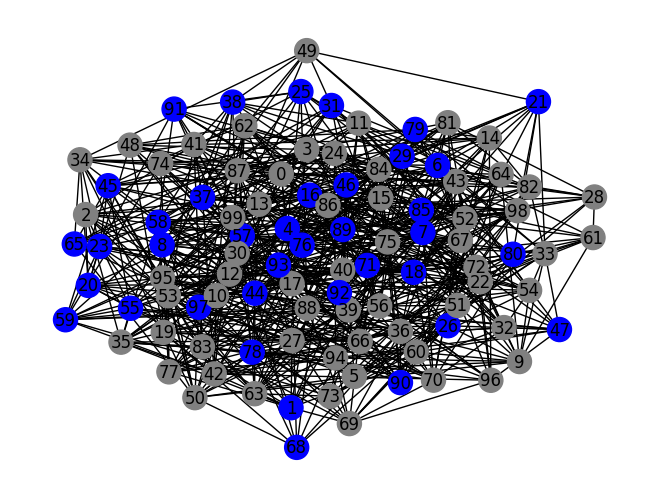

In [23]:
shuffle(graphs)
for g in graphs:
    if len(g.s) <= 1 + len([i for i in g.y if i]):
        break
    # else:
    #     raise ValueError('graph not found')
g_n = g.nx

try:
    layout = nx.planar_layout(g_n)
except:
    layout = nx.drawing.spring_layout(g_n)

node_colors = ['blue' if n in g.s else 'gray' for n in g.nx]
nx.draw(g_n, with_labels=True, node_color=node_colors, pos=layout)
g.s.sort()
print(g.s)
print([i for i, v in enumerate(g.y) if v])
print(len([i for i in g.y if i]))
print(len(g.s))

In [24]:
edge_index, node_feats = g.edge_index, torch.FloatTensor([[1]] * n)
ppo_model.actor(node_feats, edge_index).squeeze()

TypeError: forward() missing 1 required positional argument: 'nb_batch'